<a href="https://colab.research.google.com/github/jubin-k/Unemployement-Rate--covid-19/blob/main/Unemployment_Rate_in_India_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**1. Get Data**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

**2. Explore and Clean the Data**

In [35]:
df1=pd.read_csv("/content/Unemployment in India.csv")
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df2=pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [37]:
df1.shape

(768, 7)

In [38]:
df2.shape

(267, 9)

In [39]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [40]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [41]:
df1.rename(columns={'Region':'State',' Estimated Unemployment Rate (%)':'EUR',' Estimated Employed':'EE',' Estimated Labour Participation Rate (%)':'ELPR'},inplace=True)
df2.rename(columns={'Region':'State','Region.1':'Region', ' Estimated Unemployment Rate (%)':'EUR',' Estimated Employed':'EE',' Estimated Labour Participation Rate (%)':'ELPR'},inplace=True)

In [42]:
df1.drop(df1[df1['EUR']==0].index,inplace=True)

In [43]:
df2.drop(df2[df2['EUR']==0].index,inplace=True)

<AxesSubplot:>

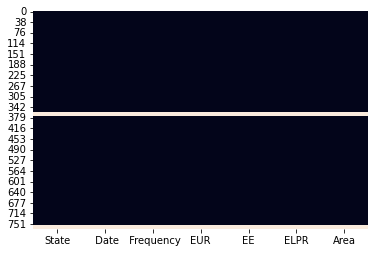

In [44]:
df1.isna().sum()
sns.heatmap(df1.isna(),cbar=False)
#we can drop these all values are on the same rows

In [45]:
df1.dropna(axis=0,inplace=True)

In [46]:
df1.shape

(729, 7)

In [47]:
df1['State'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [48]:
df2['Region'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [49]:
north=df2[df2['Region']=='North']['State'].unique()
south=df2[df2['Region']=='South']['State'].unique()
west=df2[df2['Region']=='West']['State'].unique()
east=df2[df2['Region']=='East']['State'].unique()
northeast=df2[df2['Region']=='NorthEast']['State'].unique()
#chandigarh is not mentioned in df2.so need to add it as in North

In [50]:
Region_1=[]
for i in df1['State']:
  if i in north:
    Region_1.append('North')
  elif i in south:
    Region_1.append('South')
  elif i in west:
    Region_1.append('West')
  elif i in east:
    Region_1.append('East')
  elif i in northeast:
    Region_1.append('Northeast')
  else:
    Region_1.append('North')
df1['Region']=Region_1
df1

,State,Date,Frequency,EUR,EE,ELPR,Area,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,South
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,South
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,South
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,South
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,South
...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,East
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,East
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,East
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,East


In [51]:
df1[' Frequency'].unique()
df2[' Frequency'].unique()
#its only monthly and it can be dropped from both the dfs
df1.drop([' Frequency'],axis=1,inplace=True)
df2.drop([' Frequency'],axis=1,inplace=True)

In [52]:
#splitting month and year to ad as seperate columns
df1['Month']=df1[' Date'].str.split('-').str[1]
df1['Year']=df1[' Date'].str.split('-').str[2]
df2['Month']=df2[' Date'].str.split('-').str[1]
df2['Year']=df1[' Date'].str.split('-').str[2]
df1.drop([' Date'],axis=1,inplace=True)
df2.drop([' Date'],axis=1,inplace=True)

In [53]:
df1['Date']=df1['Month']+'/'+df1['Year']
df2['Date']=df2['Month']+'/'+df2['Year']
df1.drop(['Month','Year'],axis=1,inplace=True)
df2.drop(['Month','Year'],axis=1,inplace=True)

In [54]:
#we will use df1 and df2 for visualization
#estimated employed is the percent of ppl employed
#Estimated Labour Participation Rate (%) is the rate of ppl who are actually working compared to total ppl who are eleigible for the labour

**3. Visualize the Data**

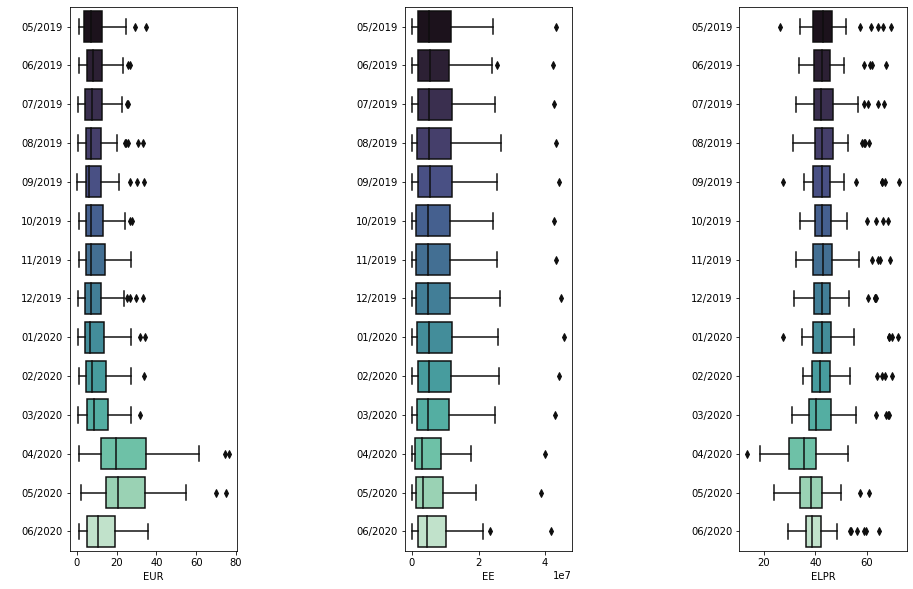

In [68]:
fig=plt.subplots(figsize=(15,10))
mnt=['EUR','EE','ELPR']
for p,q in enumerate(mnt):
  plt.subplot(1,3,p+1)
  plt.subplots_adjust(wspace=1)
  ax=sns.boxplot(x=q,y='Date',data=df1,palette='mako')
  plt.ylabel(' ')

# **How covid-19 affects the employment?**


*It is clear from the plot that during the time when covid started to increase exponentially, there was a sudden increase in unemployment rate.
likewise,employee labour participation and estimated employed rate decreased.*


In [56]:
df1.groupby(['State','Area'])['EUR'].mean().to_frame().rename({'EUR':'Estimated Unemployment Rate'},axis=1).style.background_gradient('mako_r')

Unemployment Rate is generally higher in Urban areas.
"Within countries, densely populated urban areas were the hardest hit in the first half of 2020. In rural areas, COVID-19 mortality rates increased particularly from August 2020 onwards."

In [57]:
shp_gdf = gpd.read_file('/content/Indian_states.shp')

In [58]:
merged = shp_gdf.set_index('st_nm').join(df1.set_index('State'))

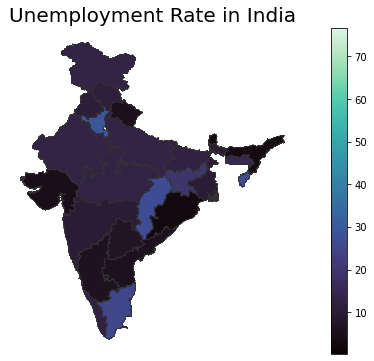

In [59]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.axis('off')
ax.set_title('Unemployment Rate in India',
             fontdict={'fontsize': '20', 'fontweight' : '15'})
fig = merged.plot(column='EUR', cmap='mako', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


Haryana,chattisgarh,Tamil nadu and tripura are the 4 states whose Unemployment rate was mainly affected by covid-19.

In [60]:
df1.corr().style.background_gradient('mako')

,EUR,EE,ELPR
EUR,1.000000,-0.238008,-0.006248
EE,-0.238008,1.000000,0.006161
ELPR,-0.006248,0.006161,1.000000


Text(0, 0.5, ' ')

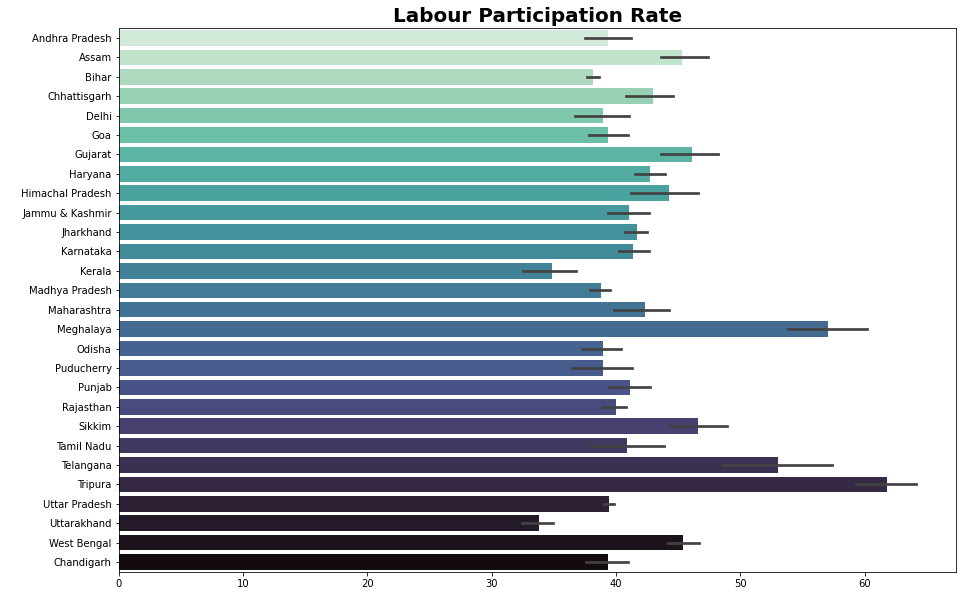

In [61]:
plt.figure(figsize=(15,10))
sns.barplot(data=df1,x='ELPR',y='State',palette='mako_r')
plt.title('Labour Participation Rate',fontsize=20,fontweight='bold')
plt.xlabel(' ')
plt.ylabel(' ')

In [62]:
high=df1['EUR'].nlargest(20).tolist()[::-1]
high_dt=df1[df1['EUR']>38]['Date'].head(20).tolist()
high_st=df1[df1['EUR']>38]['State'].head(20).tolist()
high_EUR=pd.DataFrame({'Date':high_dt,'State':high_st,'EUR':high})

Text(0, 0.5, ' ')

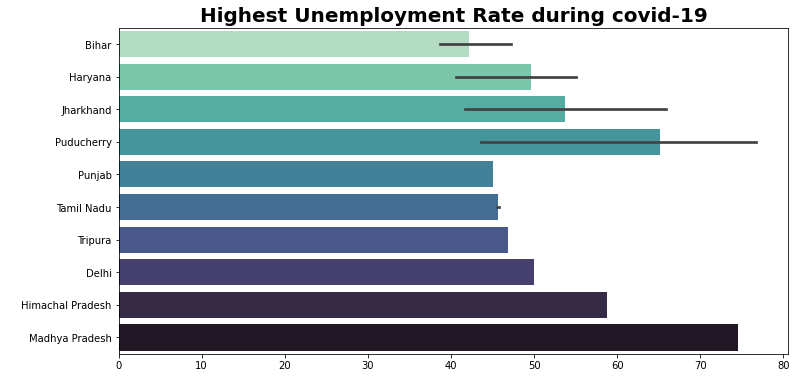

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(data=high_EUR,x='EUR',y='State',palette='mako_r')
plt.title('Highest Unemployment Rate during covid-19',fontsize=20,fontweight='bold')
plt.xlabel(' ')
plt.ylabel(' ')

# **How far the unemployemnt rate will go?**
Highest unemployment was seen between april and may.
Pudhuchery, MP, jharkhand and haryana faced the highest unemployement rate during covid-19